# Install the necessary libraries and dependencies for efficient model building

In [ ]:
!pip install "pip<24.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install python-docx docx2txt PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 86.3 MB/s eta 0:00:00


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.8 MB/s eta 0:00:00


In [ ]:
!pip install textract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 85.5 MB/s eta 0:00:00
DEPRECATION: textract 1.6.5 has a non-standard

In [ ]:
!apt-get install -y antiword

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (181 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-16_amd64.deb ...
Unpacking antiword (0.37-16) ...
Setting up antiword (0.37-16) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...


# EDA - Exploratory Data Analysis

In [ ]:
import os
import docx
import textract
import fitz  # PyMuPDF
import re
import json
import spacy
import string

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

UNWANTED_WORDS = [
    'admin', 'js', 'dba', 'dev', 'finance', 'fscm', 'technologies',
    'musquare', 'converted', 'hexaware', 'extracted', 'parsed', 'cleaned',
    'heaware', 'data', 'resume', 'cv'
]

def clean_filename(filename):
    name = os.path.splitext(filename)[0]
    name = re.sub(r'[_\[\]0-9\-]+', ' ', name)
    name = re.sub(r'(resume|cv|internship|developer|engineer|react|peoplesoft|hexaware)', '', name, flags=re.I)
    name = re.sub(r'\s+', ' ', name).strip()
    return name.title()

def clean_name(name):
    name = re.sub(r'\([^)]*\)', '', name)
    pattern = r'\b(?:' + '|'.join(map(re.escape, UNWANTED_WORDS)) + r')\b'
    name = re.sub(pattern, '', name, flags=re.IGNORECASE)
    name = re.sub(r'[_\[\]\-]', ' ', name)
    name = re.sub(r'\s+', ' ', name).strip()
    return name.title()

def extract_from_docx(file_path):
    doc = docx.Document(file_path)
    return "\n".join([para.text for para in doc.paragraphs])

def extract_from_pdf(file_path):
    text = ""
    with fitz.open(file_path) as doc:
        for page in doc:
            text += page.get_text()
    return text

def extract_from_doc(file_path):
    try:
        text = textract.process(file_path).decode("utf-8")
        return text
    except Exception as e:
        return f"Error processing .doc file: {str(e)}"

def extract_text(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == ".docx":
        return extract_from_docx(file_path)
    elif ext == ".pdf":
        return extract_from_pdf(file_path)
    elif ext == ".doc":
        return extract_from_doc(file_path)
    else:
        return "Unsupported file format."

def normalize_spaces(text):
    return re.sub(r'[\s\-]+', '', text.lower())

def extract_data(text, filename):
    data = {
        "Name": None,
        "Education": [],
        "Skills": [],
        "Languages": [],
        "Projects": []
    }

    raw_name = clean_filename(filename)
    final_name = clean_name(raw_name)
    data["Name"] = final_name if final_name else None

    lines = [re.sub(r'\s+', ' ', line).strip() for line in text.splitlines() if line.strip()]

    education_keywords = {
        "12th Pass": ["hsc", "icse", "cbse", "school", "intermediate", "mpc"],
        "BTech": ["b.tech", "btech","B.E","B/e","bachelor of technology", "bachelor of engineering", "b-tech"],
        "BSc": ["bsc", "bachelor of science"],
        "MTech": ["m.tech", "mtech", "m.e", "master of technology"],
        "MSc": ["msc", "master of science"],
        "MBA": ["mba", "master of business administration"],
        "PhD": ["phd"]
    }

    found_education = set(["12th Pass"])
    norm_lines = [normalize_spaces(line) for line in lines]

    for label, keywords in education_keywords.items():
        for kw in keywords:
            if any(normalize_spaces(kw) in line for line in norm_lines):
                found_education.add(label)
                break

    # Inference rules
    if "MTech" in found_education:
        found_education.add("BTech")
    if "MSc" in found_education:
        found_education.add("BSc")

    standard_labels = ["12th Pass", "BTech", "BSc", "MTech", "MSc", "MBA", "PhD"]
    data["Education"] = sorted(set(label for label in standard_labels if label in found_education))

    skills_keywords = {
        "HTML": ["html"],
        "CSS": ["css", "css3"],
        "JavaScript": ["javascript", "js"],
        "React": ["react", "reactjs", "react.js"],
        "Redux": ["redux"],
        "Node.js": ["node.js"],
        "SQL": ["sql"],
        "Java": ["java"],
        "Python": ["python"],
        "MongoDB": ["mongodb"],
        "C++": ["c++"],
        "C#": ["c#"],
        "C": ["c"],
        "Django": ["django"],
        "Flask": ["flask"],
        "JIRA": ["jira"],
        "PeopleSoft HCM": ["peoplesoft hcm"],
        "UNIX": ["unix"],
        "XML": ["xml"],
        "XSLT": ["xslt"],
        "X-Path": ["x-path"],
        "Oracle": ["oracle"],
        "MS PowerPoint": ["ms powerpoint"],
        "MS Excel": ["ms excel"],
        "EIB": ["eib"],
        "ES6": ["es6"],
        "SOAP": ["soap"],
        "Web Services": ["web services"]
    }

    text_punct_as_space = re.sub(r'[{}]'.format(re.escape(string.punctuation)), ' ', text)
    text_cleaned = re.sub(r'[\n\t\r]+', ' ', text_punct_as_space)
    text_cleaned = re.sub(r'\s+', ' ', text_cleaned).strip()
    text_lower = text_cleaned.lower()

    def contains_cplusplus(text):
        norm = re.sub(r'[\n\r\t,;:]+', ' ', text.lower())
        padded = f' {norm} '
        return ' c++ ' in padded

    found_skills = set()
    for skill, aliases in skills_keywords.items():
        for alias in aliases:
            if alias == "c++":
                if contains_cplusplus(text):
                    found_skills.add("C++")
            elif alias == "c":
                if re.search(r"(?<!\w)c(?![\w\+])", text_lower):
                    found_skills.add("C")
            else:
                if re.search(r"\b" + re.escape(alias) + r"\b", text_lower):
                    found_skills.add(skill)

    data["Skills"] = sorted(found_skills)

    languages_match = re.search(r"(?i)\blanguages\s*known\s*[:\-]?\s*([a-zA-Z, ]+)", text)
    if languages_match:
        langs = [lang.strip().capitalize() for lang in languages_match.group(1).split(",")]
        data["Languages"] = langs

    project_keywords = ["project", "title", "description", "responsibilities", "technologies"]
    for i, line in enumerate(lines):
        if any(kw in line.lower() for kw in project_keywords):
            block = " ".join(re.sub(r'\s+', ' ', lines[j].strip()) for j in range(i, min(i+5, len(lines))))
            data["Projects"].append(block)

    return data

def process_resumes(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith((".docx", ".doc", ".pdf")):
            file_path = os.path.join(directory, filename)
            text = extract_text(file_path)
            if text and not text.startswith("Unsupported"):
                structured = extract_data(text, filename)
                all_data.append(structured)
    return all_data

if __name__ == "__main__":
    directory = "/content/drive/MyDrive/project/Resumes"
    results = process_resumes(directory)

    output_path = os.path.join(directory, "resume_data.json")
    with open(output_path, "w") as f:
        json.dump(results, f, indent=4)

    print(f"✅ Data has been extracted and saved to: {output_path}")



✅ Data has been extracted and saved to: /content/drive/MyDrive/project/Resumes/resume_data.json


In [ ]:
import json

# Path to the JSON file
json_file_path = "/content/drive/MyDrive/project/Resumes/resume_data.json"

# Load JSON data into a Python variable
with open(json_file_path, "r") as json_file:
    resume_data = json.load(json_file)

# Verify the structure
print(json.dumps(resume_data, indent=4))


[
    {
        "Name": "Kambala Sai Surendra",
        "Education": [
            "12th Pass",
            "BTech",
            "MBA"
        ],
        "Skills": [
            "CSS",
            "HTML",
            "Java",
            "JavaScript",
            "React",
            "Redux"
        ],
        "Languages": [],
        "Projects": [
            "Project#1 mA Project#2 EDUCATION JNTU, KAKINADA",
            "Project#2 EDUCATION JNTU, KAKINADA 2015 \u2013 2018 B.Tech in Computer Science and Engineering"
        ]
    },
    {
        "Name": "Kamalakar Reddy",
        "Education": [
            "12th Pass",
            "BTech"
        ],
        "Skills": [
            "CSS",
            "HTML",
            "JIRA",
            "JavaScript",
            "React",
            "Redux"
        ],
        "Languages": [],
        "Projects": [
            "\u25cf 3 years of experience in UI Development of Enterprise Applications, Web Applicationsrelated technologies. \u25cf Expe

In [ ]:
len(resume_data)

79

In [ ]:
for i in resume_data:
  print(i['Name'])

Kambala Sai Surendra
Kamalakar Reddy
Susovan Bag
Md Khizaruddin Rauf
Pranish Sonone
Anjanipriyadarshini
Deepakreddy
Shaik Abdul Sharuk
Krishna Kanth
Ranga Gaganam
Kotanidurgaprasad
M Lokesh
Naveen Sadhu
Ravali
M Lokesh Babu
Vinay Reddy
Pragnya
Krishna Kanth
Prabakaran
Pavasgoswami
Venkatalakshmi
Rajupavanakumari
Murali
Aradhanatripathi
Chinnasubbarayudum
Anil Kumar
Himaja G
Thirupathiamma
Buddha Vamsi
Harinarayana
Priyabratahota
Neeraj Mishra
Gopi Krishna
Haripriya
Premsai
Tatikonda Kiran Kumar
Ganesh Alladi
Vinod Akkala
Rameshp
Priyanka L
Venkateswarlu B
R Ahmed
Varkala Vikas
Harikrishna Akula
Arun Venu
Gangareddy
Srikanth
Shireeshkumar
Punugoti Swetha
Subha Santosh
Ramalakshmi K
Vivekanand Sayana
Anubhavsingh
Rahul Ahuja
Priyanka Ramadoss
Psyamkumar
Mooraboyinaguravaiah
Pritam Biswas
Sskumar
Rahulm
Murali
Sirazuddinmohammad
Kamballapradeep
Hari Krishna M
Madeeswar A
Sri Krishna S
Rameshnataru
P V Sai Krishna
Naresh Babu Cherukuri
Srinivasarao
Sujatha
Vinay Kumar
G Ananda Rayudu
Hima 

In [ ]:
for i in resume_data:
  print(i['Name'] ,':', i['Skills'])

Kambala Sai Surendra : ['CSS', 'HTML', 'Java', 'JavaScript', 'React', 'Redux']
Kamalakar Reddy : ['CSS', 'HTML', 'JIRA', 'JavaScript', 'React', 'Redux']
Susovan Bag : ['C', 'C++', 'CSS', 'HTML', 'Java', 'JavaScript', 'SQL']
Md Khizaruddin Rauf : ['CSS', 'HTML', 'JavaScript', 'MongoDB', 'React', 'Redux']
Pranish Sonone : ['CSS', 'ES6', 'JavaScript', 'React', 'Redux']
Anjanipriyadarshini : ['CSS', 'HTML', 'Java', 'JavaScript', 'React', 'Web Services']
Deepakreddy : ['CSS', 'HTML', 'JavaScript', 'React', 'Redux']
Shaik Abdul Sharuk : ['JavaScript', 'React', 'Redux']
Krishna Kanth : ['CSS', 'HTML', 'JIRA', 'Java', 'JavaScript', 'React', 'Redux', 'SOAP', 'Web Services', 'XML']
Ranga Gaganam : ['CSS', 'HTML', 'JavaScript', 'React']
Kotanidurgaprasad : ['CSS', 'HTML', 'JavaScript', 'React']
M Lokesh : ['CSS', 'HTML', 'JavaScript', 'React']
Naveen Sadhu : ['CSS', 'HTML', 'React', 'SQL']
Ravali : ['Java']
M Lokesh Babu : ['CSS', 'HTML', 'JavaScript', 'React']
Vinay Reddy : ['CSS', 'HTML', 'Java

In [ ]:
for i in resume_data:
  print(i['Name'] ,':', i['Education'])

Kambala Sai Surendra : ['12th Pass', 'BTech', 'MBA']
Kamalakar Reddy : ['12th Pass', 'BTech']
Susovan Bag : ['12th Pass', 'BTech']
Md Khizaruddin Rauf : ['12th Pass', 'BSc']
Pranish Sonone : ['12th Pass', 'BTech']
Anjanipriyadarshini : ['12th Pass']
Deepakreddy : ['12th Pass', 'BTech']
Shaik Abdul Sharuk : ['12th Pass']
Krishna Kanth : ['12th Pass', 'BTech']
Ranga Gaganam : ['12th Pass']
Kotanidurgaprasad : ['12th Pass', 'BTech']
M Lokesh : ['12th Pass', 'BTech']
Naveen Sadhu : ['12th Pass', 'BTech']
Ravali : ['12th Pass']
M Lokesh Babu : ['12th Pass', 'BTech']
Vinay Reddy : ['12th Pass', 'BTech']
Pragnya : ['12th Pass']
Krishna Kanth : ['12th Pass', 'BTech']
Prabakaran : ['12th Pass', 'BTech']
Pavasgoswami : ['12th Pass', 'BTech', 'MBA', 'MTech']
Venkatalakshmi : ['12th Pass', 'BTech']
Rajupavanakumari : ['12th Pass', 'BTech']
Murali : ['12th Pass']
Aradhanatripathi : ['12th Pass']
Chinnasubbarayudum : ['12th Pass', 'BSc']
Anil Kumar : ['12th Pass', 'BTech']
Himaja G : ['12th Pass', '

#VISUALIZATION OF EDUCATION

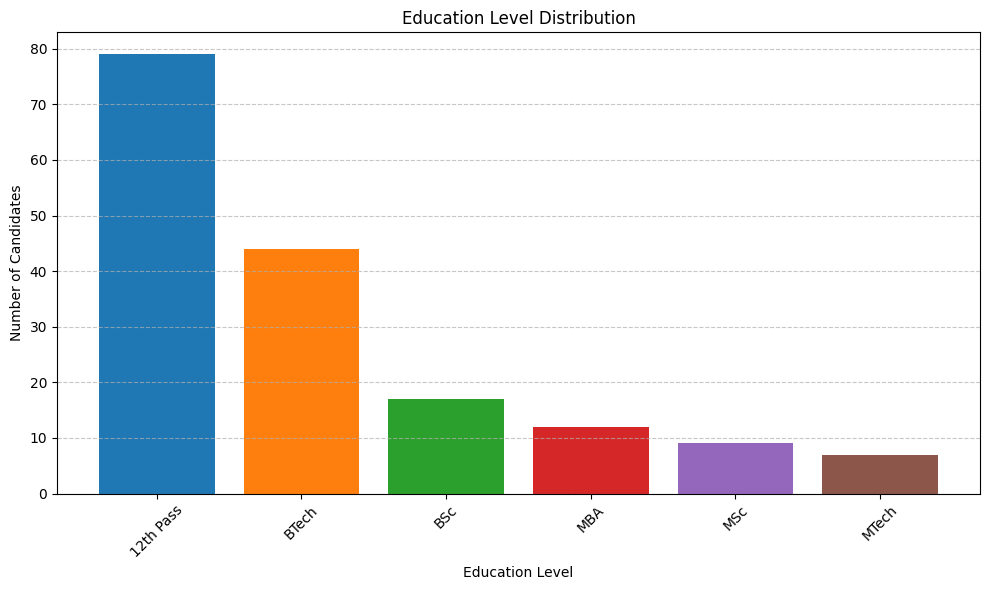

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import json

# Load resume data
with open("/content/drive/MyDrive/project/Resumes/resume_data.json", "r") as f:
    resume_data = json.load(f)

# Count education entries
education_counter = Counter()
for person in resume_data:
    education_counter.update(person.get("Education", []))

# Sort by count
labels, values = zip(*sorted(education_counter.items(), key=lambda x: x[1], reverse=True))

# Generate distinct colors
colors = plt.cm.tab10.colors if len(labels) <= 10 else plt.cm.tab20.colors
colors = colors[:len(labels)]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Number of Candidates")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
for i in resume_data:
  print(i['Name'] ,':', i['Skills'])

Kambala Sai Surendra : ['CSS', 'HTML', 'Java', 'JavaScript', 'React', 'Redux']
Kamalakar Reddy : ['CSS', 'HTML', 'JIRA', 'JavaScript', 'React', 'Redux']
Susovan Bag : ['C', 'C++', 'CSS', 'HTML', 'Java', 'JavaScript', 'SQL']
Md Khizaruddin Rauf : ['CSS', 'HTML', 'JavaScript', 'MongoDB', 'React', 'Redux']
Pranish Sonone : ['CSS', 'ES6', 'JavaScript', 'React', 'Redux']
Anjanipriyadarshini : ['CSS', 'HTML', 'Java', 'JavaScript', 'React', 'Web Services']
Deepakreddy : ['CSS', 'HTML', 'JavaScript', 'React', 'Redux']
Shaik Abdul Sharuk : ['JavaScript', 'React', 'Redux']
Krishna Kanth : ['CSS', 'HTML', 'JIRA', 'Java', 'JavaScript', 'React', 'Redux', 'SOAP', 'Web Services', 'XML']
Ranga Gaganam : ['CSS', 'HTML', 'JavaScript', 'React']
Kotanidurgaprasad : ['CSS', 'HTML', 'JavaScript', 'React']
M Lokesh : ['CSS', 'HTML', 'JavaScript', 'React']
Naveen Sadhu : ['CSS', 'HTML', 'React', 'SQL']
Ravali : ['Java']
M Lokesh Babu : ['CSS', 'HTML', 'JavaScript', 'React']
Vinay Reddy : ['CSS', 'HTML', 'Java

#VISUALIZATION OF SKILLSET

<ipython-input-10-8ae4f608f614>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(labels)).colors


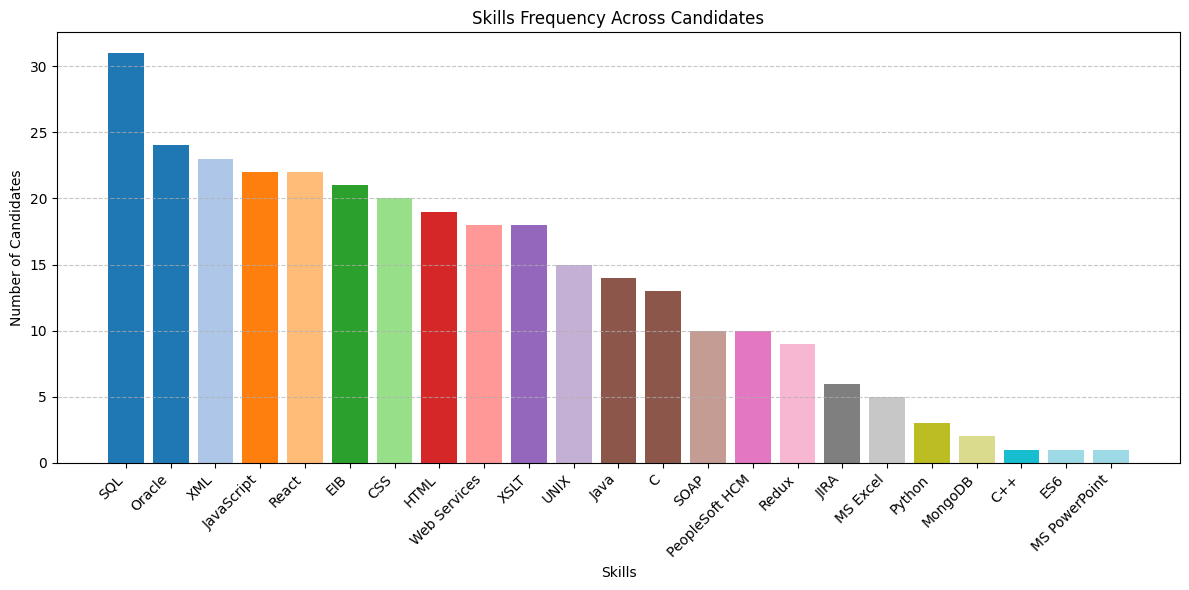

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import json

# Load resume data
with open("/content/drive/MyDrive/project/Resumes/resume_data.json", "r") as f:
    resume_data = json.load(f)

# Count skills
skills_counter = Counter()
for person in resume_data:
    skills_counter.update(person.get("Skills", []))

# Sort by frequency
labels, values = zip(*sorted(skills_counter.items(), key=lambda x: x[1], reverse=True))

# Generate distinct colors
colors = plt.cm.get_cmap('tab20', len(labels)).colors

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color=colors[:len(labels)])
plt.title("Skills Frequency Across Candidates")
plt.xlabel("Skills")
plt.ylabel("Number of Candidates")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
for i in resume_data:
  print(i['Name'] ,':', i['Projects'])

Kambala Sai Surendra : ['Project#1 mA Project#2 EDUCATION JNTU, KAKINADA', 'Project#2 EDUCATION JNTU, KAKINADA 2015 – 2018 B.Tech in Computer Science and Engineering']
Kamalakar Reddy : ['● 3 years of experience in UI Development of Enterprise Applications, Web Applicationsrelated technologies. ● Experience in Development, Coding, Maintenance,Design, Implementation of Web applications using HTML5, CSS3, JavaScript, j Query, React JS, Redux. ● Well versed in designing websites, Web Applications. ● Well versed in different Project Management Tools e.g. JIRA, GIT, Bit bucket. ● Tested cross browser design issues and fixed major layout bugs for supported browsers. ● Self-motivated with good communication and interpersonalskills. ● Ability to work independently and multitasking without negative impact to timelines orquality.', '● Well versed in different Project Management Tools e.g. JIRA, GIT, Bit bucket. ● Tested cross browser design issues and fixed major layout bugs for supported browse

In [ ]:
!pip install wordcloud


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# ***RESUME CLASSIFICATION***

In [ ]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.listdir('/content/drive/MyDrive/project_new/Resumes')

['React JS Developer', 'SQL Developer', 'Workday', 'PeopleSoft']

In [ ]:
file_path1 = []
category1 = []
directory1 = '/content/drive/MyDrive/project_new/Resumes/PeopleSoft'

for filename in os.listdir(directory1):
    if filename.lower().endswith(('.doc', '.docx', '.pdf')):
        file_full_path = os.path.join(directory1, filename)
        try:
            text = textract.process(file_full_path).decode('utf-8')
            file_path1.append(text)
            category1.append('PeopleSoft')
        except Exception as e:
            print(f"Failed to process {filename}: {e}")


In [ ]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
3,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
5,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft
6,\nRahul Ahuja\n-------------------------------...,PeopleSoft
7,\n\nR Ahmed\n PeopleS...,PeopleSoft
8,\n PEOPLESOFT Adminis...,PeopleSoft
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft


In [ ]:
file_path2 = []
category2 = []
directory2 = '/content/drive/MyDrive/project_new/Resumes/React JS Developer'

for filename in os.listdir(directory2):
    if filename.lower().endswith(('.doc', '.docx', '.pdf')):
        file_full_path = os.path.join(directory2, filename)
        try:
            text = textract.process(file_full_path).decode('utf-8')
            file_path2.append(text)
            category2.append('React JS Developer')
        except Exception as e:
            print(f"Failed to process {filename}: {e}")

In [ ]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React JS Developer
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer
4,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
5,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
6,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
7,\n CURRICULUM VIT...,React JS Developer
8,Name: Ravali P \n\n\n\n ...,React JS Developer
9,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer


In [ ]:
file_path3 = []
category3 = []
directory3 = '/content/drive/MyDrive/project_new/Resumes/SQL Developer'

for filename in os.listdir(directory3):
    if filename.lower().endswith(('.doc', '.docx', '.pdf')):
        file_full_path = os.path.join(directory3, filename)
        try:
            text = textract.process(file_full_path).decode('utf-8')
            file_path3.append(text)
            category3.append('SQL Developer')
        except Exception as e:
            print(f"Failed to process {filename}: {e}")

In [ ]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
2,KAMBALLA PRADEEP ...,SQL Developer
3,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
4,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
5,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
6,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
7,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer
8,BUDDHA VAMSI ...,SQL Developer
9,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer


In [ ]:
file_path4 = []
category4 = []
directory4 = '/content/drive/MyDrive/project_new/Resumes/Workday'

for filename in os.listdir(directory4):
    if filename.lower().endswith(('.doc', '.docx', '.pdf')):
        file_full_path = os.path.join(directory4, filename)
        try:
            text = textract.process(file_full_path).decode('utf-8')
            file_path4.append(text)
            category4.append('Workday')
        except Exception as e:
            print(f"Failed to process {filename}: {e}")

In [ ]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
1,\n\n Madeeswar A\n...,Workday
2,\n Hari Krishna ...,Workday
3,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
4,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday
5,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday
6,\nShireesh ...,Workday
7,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
8,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday
9,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday


In [ ]:
resume_data = pd.concat([data1, data2, data3, data4], ignore_index=True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
3,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
74,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,NaN,NaN,NaN,Workday
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,NaN,NaN,NaN,Workday
76,Workday HCM Techno functional Consultant ...,NaN,NaN,NaN,Workday
77,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday


In [ ]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
74,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,NaN,NaN,NaN,Workday,Workday
75,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,NaN,NaN,NaN,Workday,Workday
76,Workday HCM Techno functional Consultant ...,NaN,NaN,NaN,Workday,Workday
77,Vinay kumar .v\nWorkday Functional Consultant\...,NaN,NaN,NaN,Workday,Workday


In [ ]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [ ]:
resume_data

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
2,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
3,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
...,...,...
74,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
75,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...
76,Workday,Workday HCM Techno functional Consultant ...
77,Workday,Vinay kumar .v\nWorkday Functional Consultant\...


In [ ]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [ ]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
2,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
3,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
...,...,...
74,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
75,Workday,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...
76,Workday,Workday HCM Techno functional Consultant ...
77,Workday,Vinay kumar .v\nWorkday Functional Consultant\...


In [ ]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [ ]:
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [ ]:
resume_data[:20]

,Category,Raw_Details,Resume_Details
0,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
2,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,profile summary years experience implementing ...
6,PeopleSoft,\nRahul Ahuja\n-------------------------------...,rahul ahuja summary years experience peoplesof...
7,PeopleSoft,\n\nR Ahmed\n PeopleS...,ahmed peoplesoft technical consultant professi...
8,PeopleSoft,\n PEOPLESOFT Adminis...,peoplesoft administrator srinivas experience s...
9,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...


In [ ]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,priyabrata hota career objective pursuing peop...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
74,Workday,jyoti verma professional summary professional ...
75,Workday,hima mendu career objective continue growing k...
76,Workday,workday hcm techno functional consultant rahul...
77,Workday,vinay kumar workday functional consultant expe...


In [ ]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,priyabrata hota career objective pursuing peop...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
74,Workday,jyoti verma professional summary professional ...
75,Workday,hima mendu career objective continue growing k...
76,Workday,workday hcm techno functional consultant rahul...
77,Workday,vinay kumar workday functional consultant expe...


# ***CLASSIFICATION BASED ON FILE TYPE***

In [ ]:
file_path   = r'/content/drive/MyDrive/project_new/Resumes'
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [ ]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [ ]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

## VISUALIZATION OF FILE TYPE

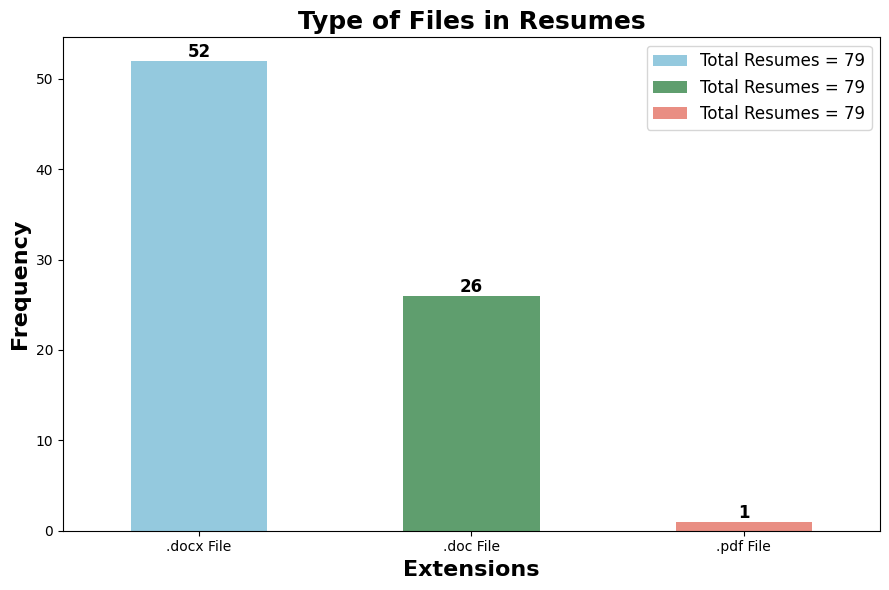

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, pylab

# Sample data
extensions = ['.docx File', '.doc File', '.pdf File']
frequencies = [len(docx_file), len(doc_file), len(pdf_file)]
colors = ['skyblue', '#55a868', 'salmon']  # Customize as needed

fig, axe = plt.subplots(1, 1, figsize=(9, 6), dpi=100)

# Create barplot with custom colors
ax = sns.barplot(
    x=extensions,
    y=frequencies,
    palette=colors,
    width=0.5,
    ax=axe,
    label='Total Resumes = {}'.format(sum(frequencies))
)

# Styling
axe.set_xlabel('Extensions', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.legend(loc='best', fontsize='large')
plt.title('Type of Files in Resumes', fontsize=18, fontweight='bold')

# Add value labels
for container in ax.containers:
    ax.bar_label(container, color='black', fontweight='bold', fontsize=12)

# Final layout tweaks
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# ***CLASSIFICATION BASED ON JOB ROLE***

In [ ]:
file_path = r'/content/drive/MyDrive/project_new/Resumes'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [ ]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,React JS Developer,React JS Developer_Venkatalakshmi (1)-converte...
1,React JS Developer,React Developer_PavasGoswami.doc
2,React JS Developer,Reactjs Developer_M Lokesh.docx
3,React JS Developer,Reactjs Developer_Ranga Gaganam_Musquare Techn...
4,React JS Developer,React Developer_Naveen sadhu.docx
...,...,...
74,PeopleSoft,Resume_Subha Santosh_Peoplesoft FSCM.docx
75,PeopleSoft,Peoplesoft Admin_SirazuddinMohammad.docx
76,PeopleSoft,Peoplesoft FSCM_Murali.docx
77,PeopleSoft,Peoplesoft Finance_Pritam Biswas.doc


In [ ]:
resume_data.Profile.value_counts()

,count
Profile,
React JS Developer,24
Workday,21
PeopleSoft,20
SQL Developer,14


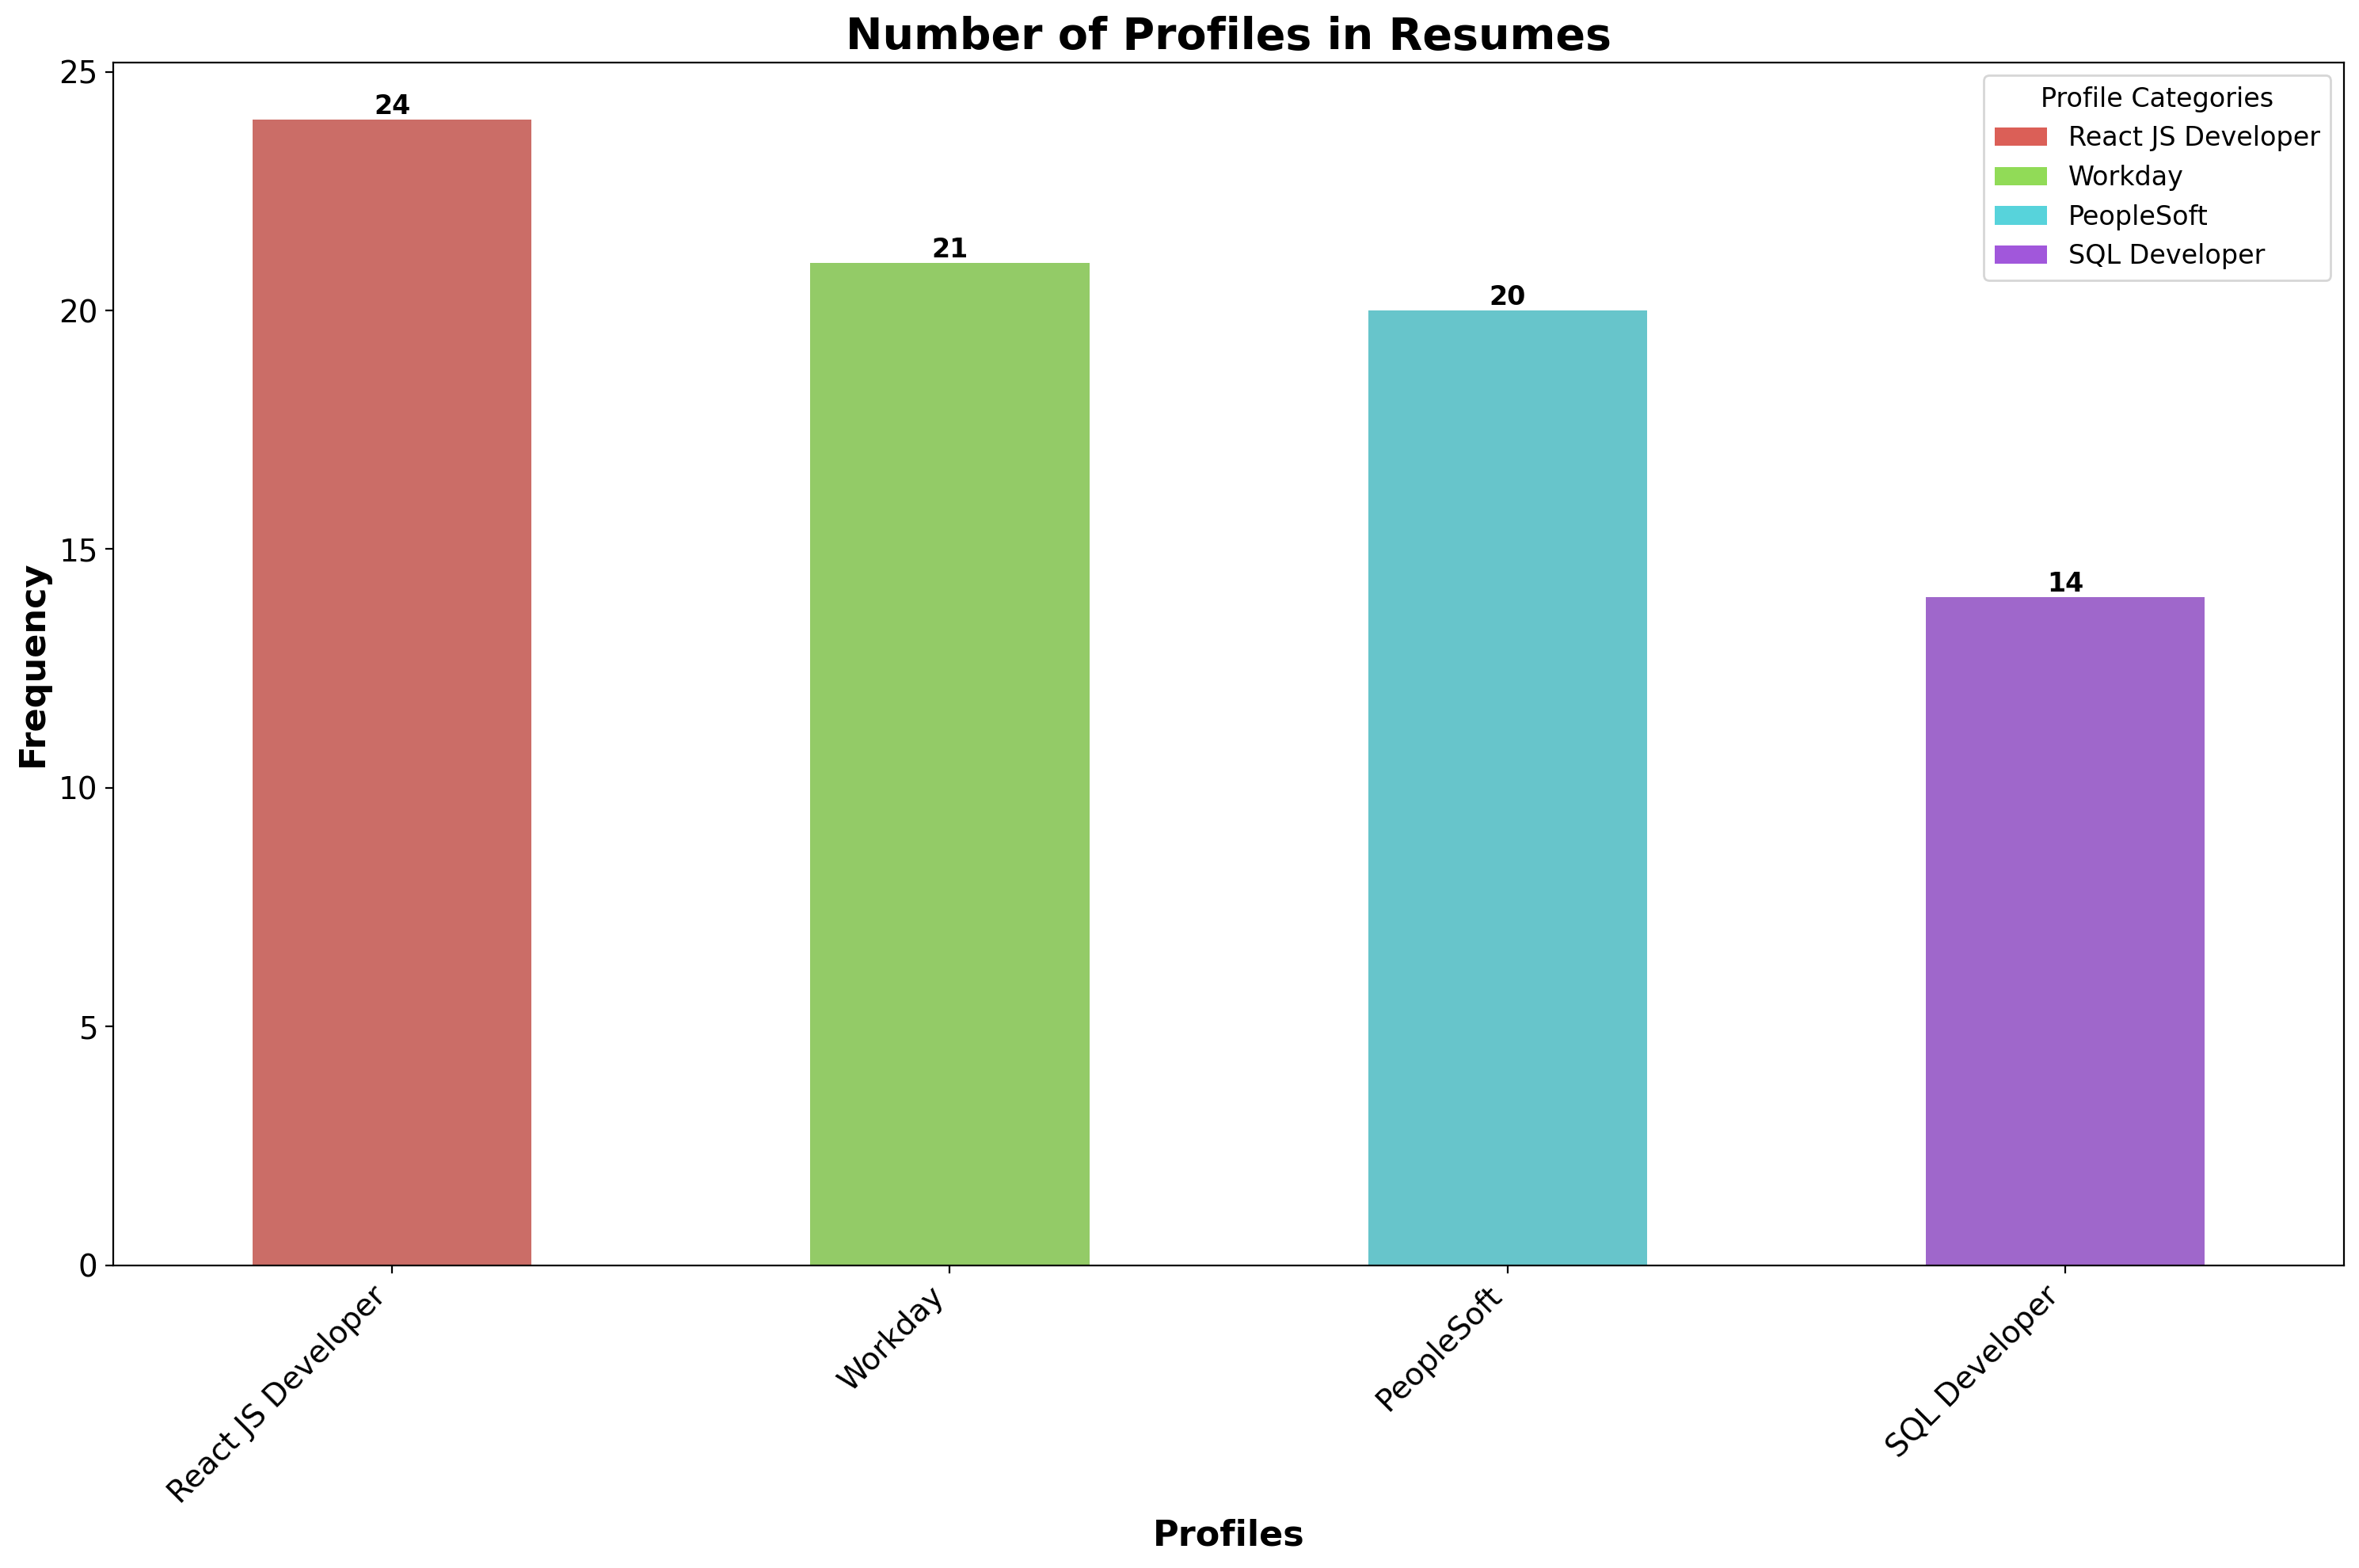

In [ ]:
from matplotlib.patches import Patch

profile_counts = resume_data['Profile'].value_counts()
profiles = profile_counts.index
frequencies = profile_counts.values

# Custom colors
colors = sns.color_palette("hls", len(profiles))

# Plot bar chart
fig, axe = plt.subplots(1, 1, figsize=(15, 10), dpi=200)
ax = sns.barplot(
    x=profiles,
    y=frequencies,
    palette=colors,
    width=0.5,
    ax=axe
)

# Labels and title
axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, color='black', fontweight='bold', fontsize=12)

# ✅ Manually create the legend using color patches
legend_elements = [Patch(facecolor=colors[i], label=profiles[i]) for i in range(len(profiles))]
plt.legend(handles=legend_elements, title='Profile Categories', fontsize='large', title_fontsize='large', loc='best')

fig.tight_layout()
plt.show()

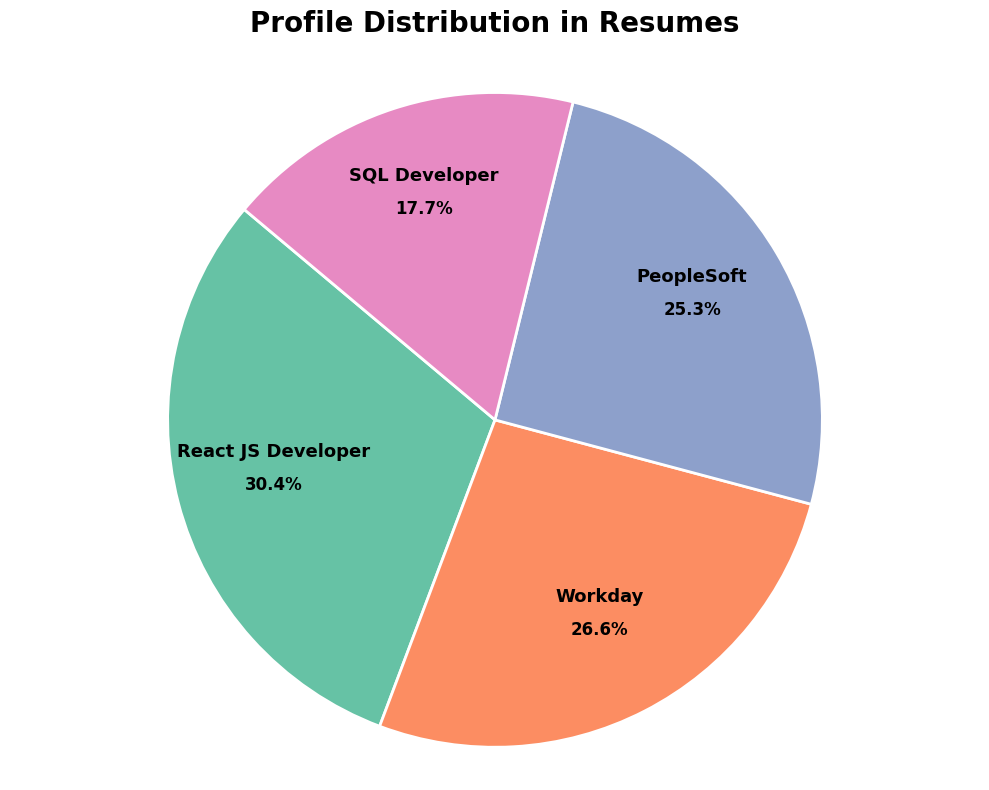

In [ ]:
import numpy as np

# Data
profile_counts = resume_data['Profile'].value_counts()
labels = profile_counts.index
sizes = profile_counts.values
colors = sns.color_palette("Set2", len(labels))  #Use a softer, more readable palette

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(
    sizes,
    labels=None,        # We'll manually place labels
    startangle=140,
    colors=colors,
    textprops={'fontsize': 13, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add custom labels and percentages inside the wedges
for i, (wedge, label, size) in enumerate(zip(wedges, labels, sizes)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))

    percent = f'{size / sum(sizes) * 100:.1f}%'

    # Position label slightly above and percent below
    ax.text(0.7 * x, 0.7 * y + 0.08, label, ha='center', va='center', fontsize=13, fontweight='bold')
    ax.text(0.7 * x, 0.7 * y - 0.02, percent, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Title and layout
ax.set_title('Profile Distribution in Resumes', fontsize=20, fontweight='bold', pad=20)
ax.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()

In [ ]:
resume_data = pd.read_csv('/content/Cleaned_Resumes.csv')

countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [ ]:
resume_data

,Category,Resume_Details
0,PeopleSoft,peoplesoft administration vivekanand sayana ca...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,priyabrata hota career objective pursuing peop...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
74,Workday,jyoti verma professional summary professional ...
75,Workday,hima mendu career objective continue growing k...
76,Workday,workday hcm techno functional consultant rahul...
77,Workday,vinay kumar workday functional consultant expe...


In [ ]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
5,359,server
6,332,data
7,326,reports
8,326,project
9,280,sql


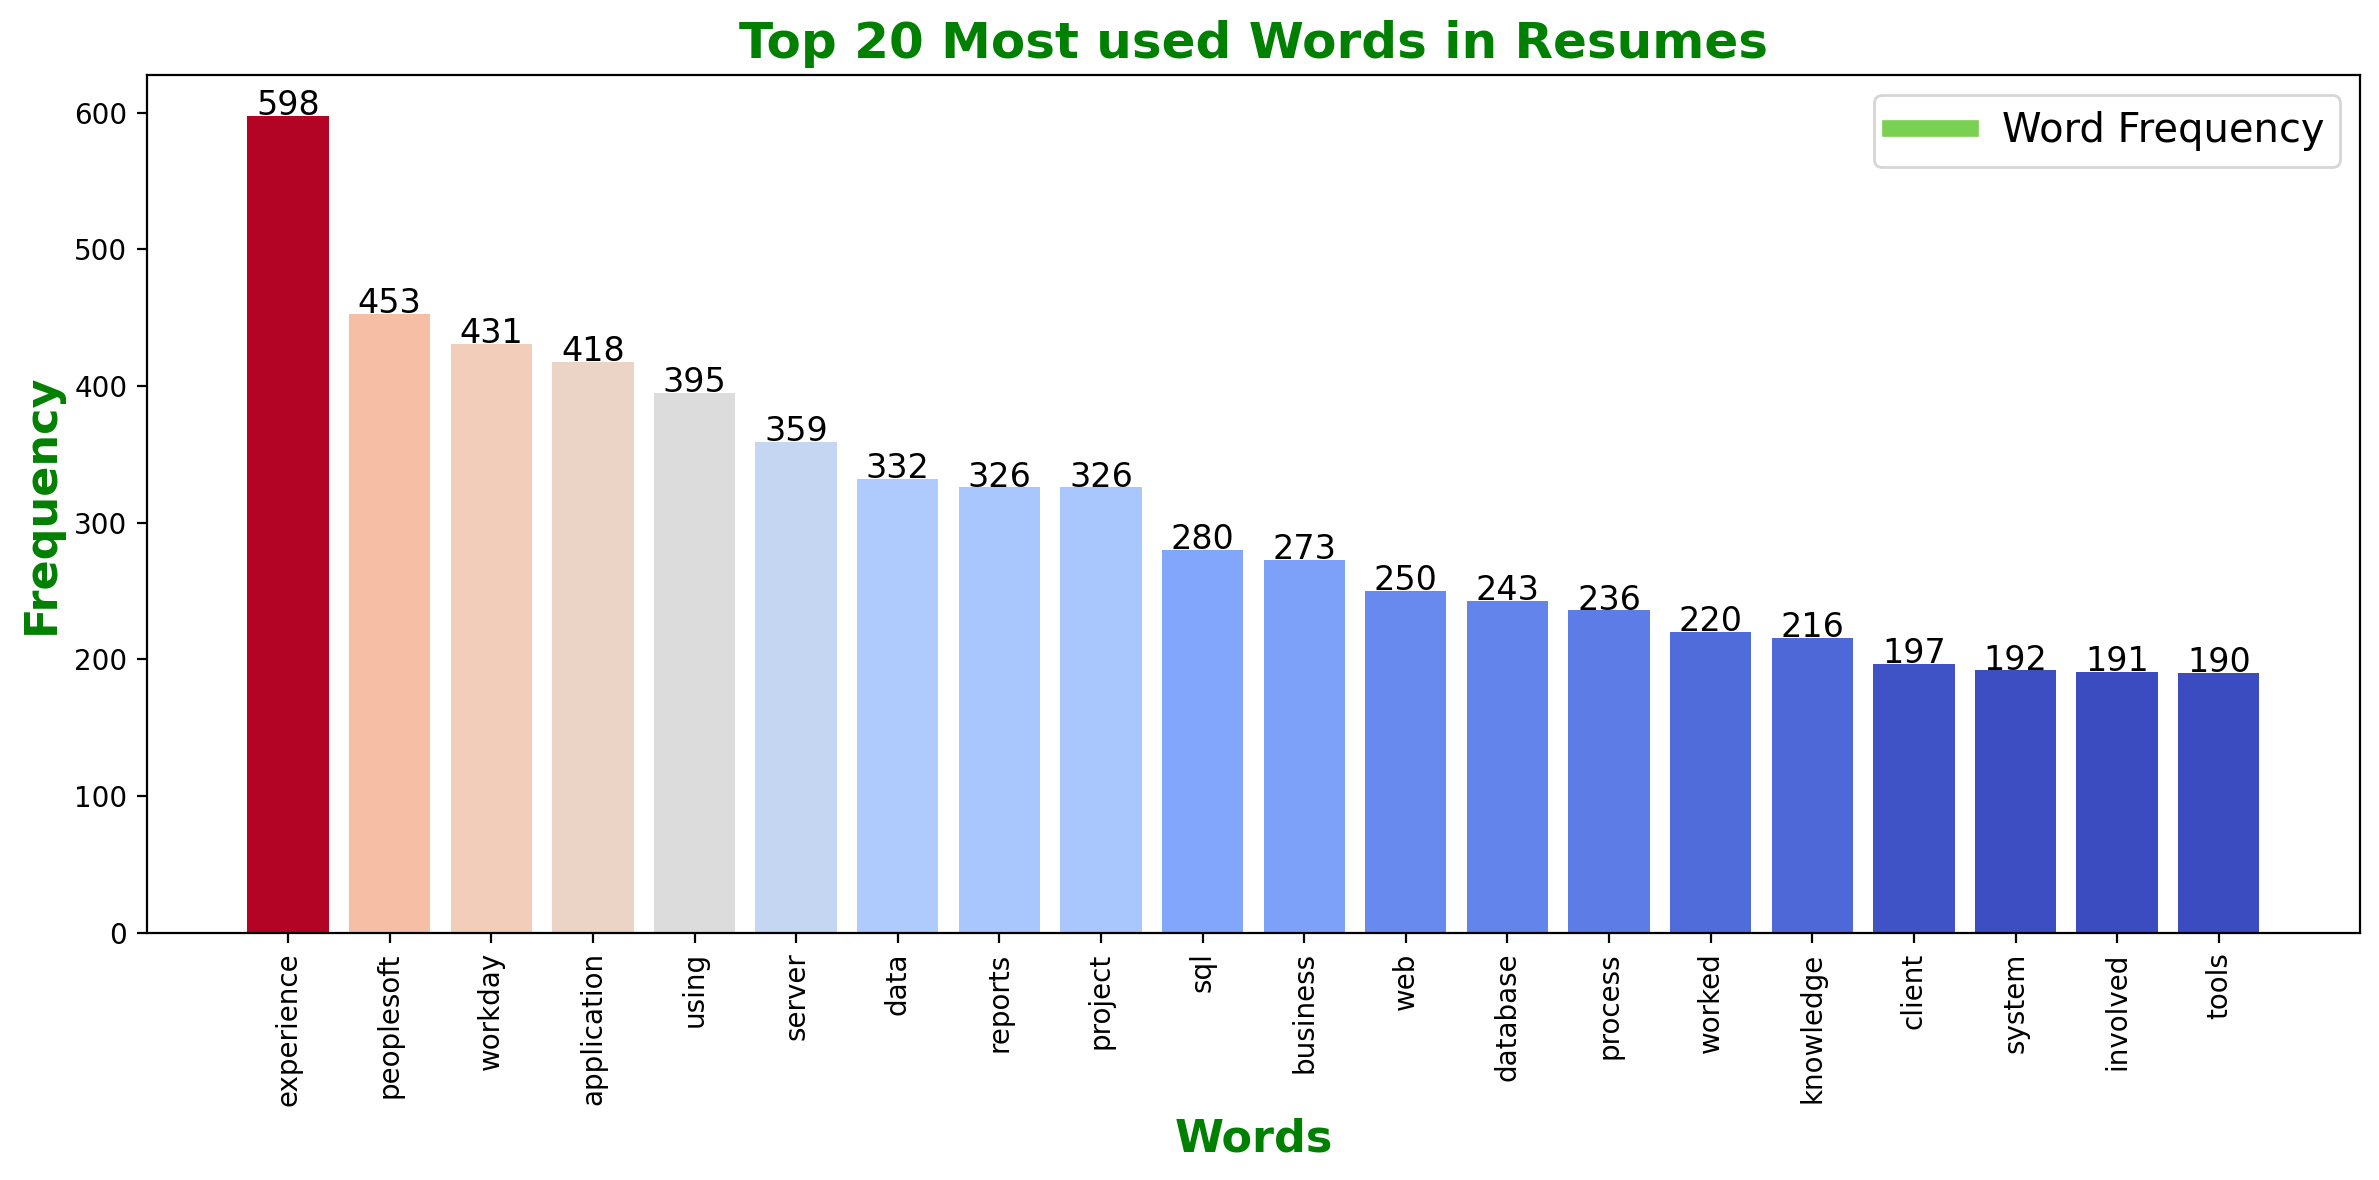

In [ ]:
import matplotlib.cm as cm

top_words = df_ngram.head(20)

fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# Normalize frequencies for gradient mapping
norm = plt.Normalize(top_words['Frequency'].min(), top_words['Frequency'].max())
colors = cm.coolwarm(norm(top_words['Frequency']))  # You can try other colormaps like 'plasma', 'cool', 'magma'

# Plot bars manually with gradient colors
bars = ax.bar(
    top_words['Unigram_Bigram'],
    top_words['Frequency'],
    color=colors
)

# Customize the plot
ax.set_xlabel('Words', size=16, fontweight='bold', color= 'green')
ax.set_ylabel('Frequency', size=16, fontweight='bold', color= 'green')
plt.xticks(rotation=90)
plt.title('Top 20 Most used Words in Resumes', fontsize=18, fontweight='bold', color='green')

# Add labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}', ha='center', fontsize=12, fontweight='medium')

# Optional legend
from matplotlib.lines import Line2D
legend_element = [Line2D([0], [0], color=cm.viridis(0.8), lw=6, label='Word Frequency')]
ax.legend(handles=legend_element, loc='best', fontsize='x-large')

plt.tight_layout()
plt.show()

# ***TF-IDF VECTORIZATION***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Extract the resume text
resume_texts = resume_data['Resume_Details']

# 2. Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # You can tweak max_features as needed

# 3. Fit and transform the resume texts
X_tfidf = tfidf.fit_transform(resume_texts)

# Now X_tfidf is your feature matrix (sparse) for modeling
print(X_tfidf.shape)  # (n_samples, n_features)

(79, 4351)


***SPLITTING DATA***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X_tfidf, resume_data['Category'], test_size=0.2, random_state=20)

# ***MODEL BUILDING AND EVALUATION***

# ***LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         1

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




# ***K NEAREST NEIGHBORS***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.70
Accuracy of  test set    : 0.62
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       0.67      0.50      0.57         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.17      1.00      0.29         1

          accuracy                           0.62        16
         macro avg       0.46      0.62      0.46        16
      weighted avg       0.61      0.62      0.60        16




# ***RANDOM FOREST***

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier


model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)


Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         1

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




# ***SUPPORT VECTOR MACHINE (SVM)***

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.94
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       0.88      1.00      0.93         7
     SQL Developer       1.00      0.75      0.86         4
           Workday       1.00      1.00      1.00         1

          accuracy                           0.94        16
         macro avg       0.97      0.94      0.95        16
      weighted avg       0.95      0.94      0.94        16




# ***BAGGING(KNN)***

In [ ]:
from sklearn.ensemble import BaggingClassifier

model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         1

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




# ***DECISION TREE***

In [ ]:
from sklearn.tree import DecisionTreeClassifier


model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         1

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




# ***BOOSTING (ADABOOST)***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.41
Accuracy of  test set    : 0.50
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       0.00      0.00      0.00         7
     SQL Developer       0.33      1.00      0.50         4
           Workday       0.00      0.00      0.00         1

          accuracy                           0.50        16
         macro avg       0.33      0.50      0.38        16
      weighted avg       0.33      0.50      0.38        16




# ***BOOSTING (Gradient Boosting)***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         1

          accuracy                           1.00        16
         macro avg       1.00      1.00      1.00        16
      weighted avg       1.00      1.00      1.00        16




# ***NAIVE BAYES***

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.94
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         4
React JS Developer       1.00      1.00      1.00         7
     SQL Developer       1.00      0.75      0.86         4
           Workday       0.50      1.00      0.67         1

          accuracy                           0.94        16
         macro avg       0.88      0.94      0.88        16
      weighted avg       0.97      0.94      0.94        16




# ***MODEL EVALUATION***

In [ ]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.698413,0.62,0.46,0.62,0.46
1,DecisionTree Classifier,1.000000,1.00,1.00,1.00,1.00
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.94,0.97,0.94,0.95
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,1.000000,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,0.412698,0.50,0.33,0.50,0.38
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,0.94,0.88,0.94,0.88


In [ ]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

***Train Test Accuracy Plot***

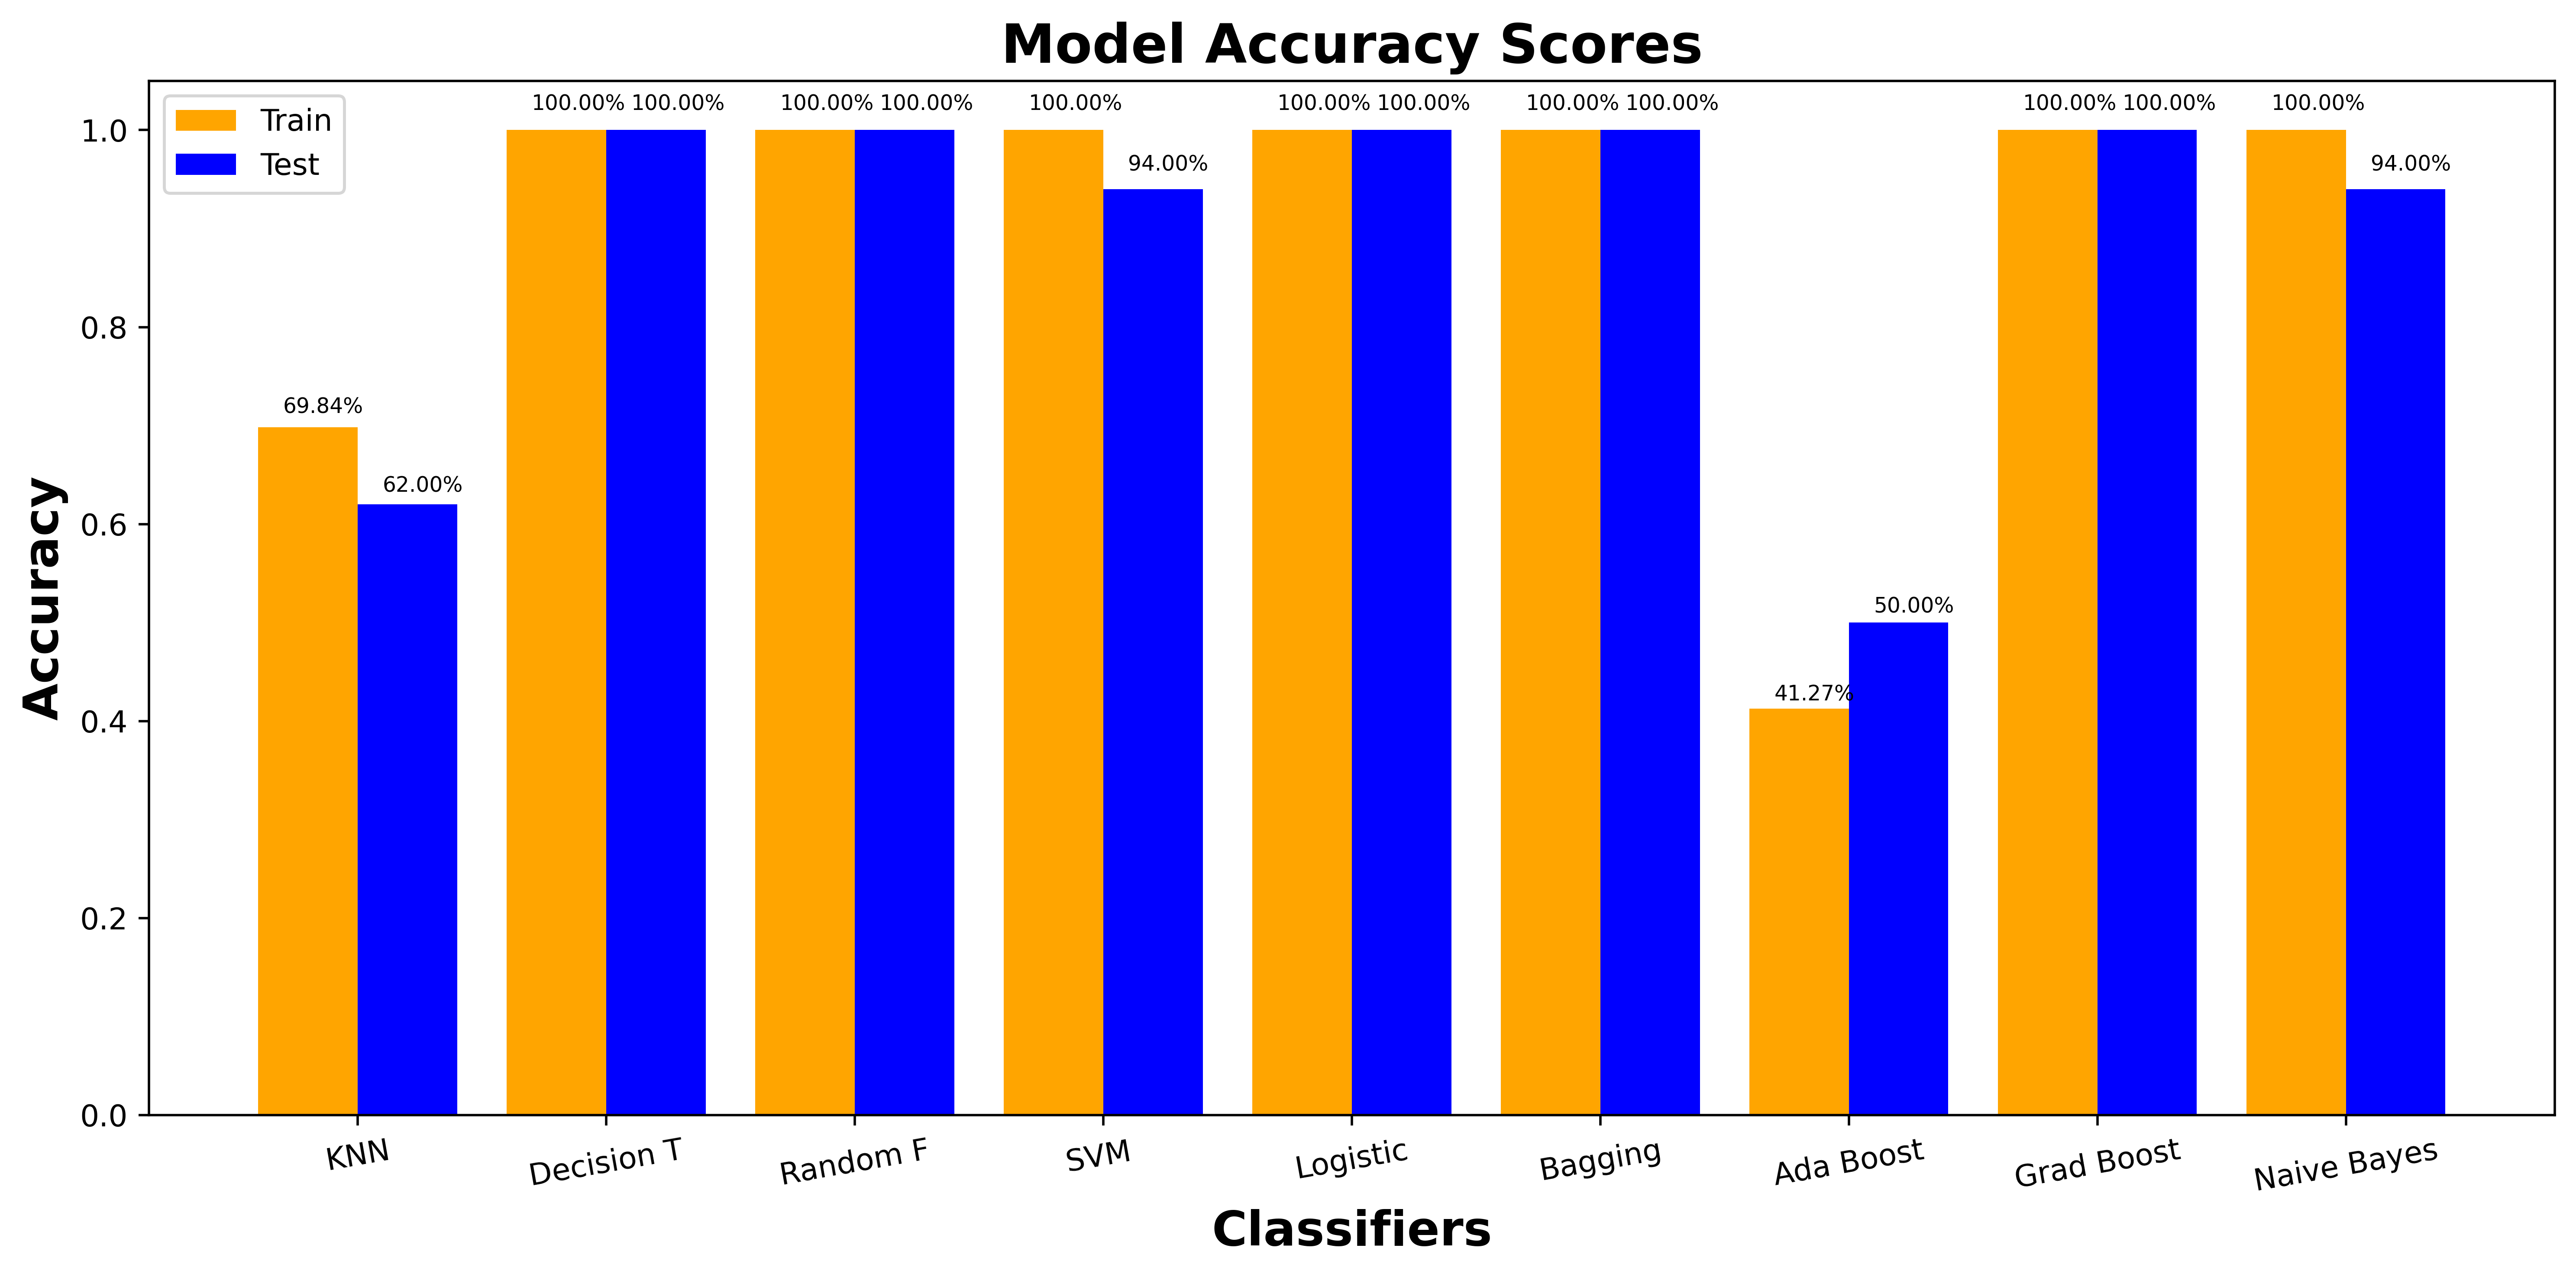

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

# ***DEPLOYEMENT FILES***

In [ ]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [ ]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf,open(filename,'wb'))